In [ ]:
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, f1_score

In [2]:
def load_cifar10_batch(file_path):
    with open(file_path, 'rb') as f:
        batch = pickle.load(f, encoding='bytes')
        images = batch[b'data']
        labels = batch[b'labels']
        images = images.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
        images = images.astype('float32') / 255.0
        labels = np.array(labels)
        return images, labels

train_images = []
train_labels = []

for i in range (5):
    file_path = f"D:/Cool Yeah/Semester VI/IF3270 - Pembejalaran Mesin/Tubes 2/cifar-10-python/cifar-10-batches-py/data_batch_{i+1}"
    images, labels = load_cifar10_batch(file_path)
    train_images.append(images)
    train_labels.append(labels)

train_images = np.concatenate(train_images)
train_labels = np.concatenate(train_labels)

x_test, y_test = load_cifar10_batch("D:/Cool Yeah/Semester VI/IF3270 - Pembejalaran Mesin/Tubes 2/cifar-10-python/cifar-10-batches-py/test_batch")

In [3]:
x_train, x_val, y_train, y_val = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42, stratify=train_labels
)

### Variasi 1

<p>
Spesifikasi:<br/>
2 layer konvolusi:<br/>
- filter 32 dengan ukuran 3 x 3 dan aktivasi relu<br/>
- filter 64 dengan ukuran 3 x 3 dan aktivasi relu<br/>
2 layer max pooling dengan ukuran 2 x 2<br/>
1 flatten<br/>
2 layer dense:<br/>
- 1 dengan 64 neuron dan aktivasi relu<br/>
- 1 dengan 10 neuron dan aktivasi softmax
</p>

In [4]:
model_1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model_1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_1 = model_1.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_val, y_val)
)

c:\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.3367 - loss: 1.8215 - val_accuracy: 0.4951 - val_loss: 1.4149
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5305 - loss: 1.3184 - val_accuracy: 0.5762 - val_loss: 1.2036
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5989 - loss: 1.1452 - val_accuracy: 0.6063 - val_loss: 1.1215
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6325 - loss: 1.0511 - val_accuracy: 0.6289 - val_loss: 1.0688
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6611 - loss: 0.9749 - val_accuracy: 0.6411 - val_loss: 1.0364
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6859 - loss: 0.9153 - val_accuracy: 0.6584 - val_loss: 0.9967
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6999 - loss: 0.8670 - val_accuracy: 0.6666 - val_loss: 0.9680
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7165 - loss: 0.8282 - val_accuracy: 

### Variasi 2

<p>
Spesifikasi:<br/>
2 layer konvolusi:<br/>
- filter 32 dengan ukuran 5 x 5 dan aktivasi relu<br/>
- filter 64 dengan ukuran 5 x 5 dan aktivasi relu<br/>
2 layer max pooling dengan ukuran 2 x 2<br/>
1 flatten<br/>
2 layer dense:<br/>
- 1 dengan 64 neuron dan aktivasi relu<br/>
- 1 dengan 10 neuron dan aktivasi softmax
</p>

In [5]:
model_2 = Sequential([
    Conv2D(32, (5, 5), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (5, 5), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model_2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_2 = model_2.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_val, y_val)
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.3208 - loss: 1.8587 - val_accuracy: 0.4922 - val_loss: 1.3984
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.5171 - loss: 1.3602 - val_accuracy: 0.5471 - val_loss: 1.2969
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.5842 - loss: 1.1823 - val_accuracy: 0.5958 - val_loss: 1.1516
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.6244 - loss: 1.0753 - val_accuracy: 0.6270 - val_loss: 1.0711
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.6529 - loss: 0.9930 - val_accuracy: 0.6398 - val_loss: 1.0293
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.6706 - loss: 0.9335 - val_accuracy: 0.6440 - val_loss: 1.0259
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.6893 - loss: 0.8885 - val_accuracy: 0.6620 - val_loss: 0.9811
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.7055 - loss: 0.8295 - val_ac

### Variasi 3

<p>
Spesifikasi:<br/>
2 layer konvolusi:<br/>
- filter 32 dengan ukuran 7 x 7 dan aktivasi relu<br/>
- filter 64 dengan ukuran 7 x 7 dan aktivasi relu<br/>
2 layer max pooling dengan ukuran 2 x 2<br/>
1 flatten<br/>
2 layer dense:<br/>
- 1 dengan 64 neuron dan aktivasi relu<br/>
- 1 dengan 10 neuron dan aktivasi softmax
</p>

In [6]:
model_3 = Sequential([
    Conv2D(32, (7, 7), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (7, 7), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model_3.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_3 = model_3.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_val, y_val)
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.3049 - loss: 1.8920 - val_accuracy: 0.4592 - val_loss: 1.5091
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.4745 - loss: 1.4506 - val_accuracy: 0.4982 - val_loss: 1.4285
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.5353 - loss: 1.3037 - val_accuracy: 0.5485 - val_loss: 1.2678
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.5755 - loss: 1.1951 - val_accuracy: 0.5797 - val_loss: 1.1989
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 26ms/step - accuracy: 0.6037 - loss: 1.1244 - val_accuracy: 0.5779 - val_loss: 1.2000
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.6320 - loss: 1.0567 - val_accuracy: 0.5946 - val_loss: 1.1753
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.6474 - loss: 1.0048 - val_accuracy: 0.6028 - val_loss: 1.1440
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.6628 - loss: 0.9530 - val_

In [7]:
def evaluate_model(model, x_test, y_test, history):
    y_pred = model.predict(x_test)
    y_pred_classes = y_pred.argmax(axis=1)
    
    f1 = f1_score(y_test, y_pred_classes, average='macro')
    print(classification_report(y_test, y_pred_classes))
    print(f"Macro F1-score: {f1:.4f}")

    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Training vs Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    return f1

### Evaluasi Model 1

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.63      0.80      0.71      1000
           1       0.79      0.83      0.81      1000
           2       0.60      0.53      0.56      1000
           3       0.49      0.49      0.49      1000
           4       0.71      0.49      0.58      1000
           5       0.50      0.73      0.59      1000
           6       0.81      0.72      0.76      1000
           7       0.71      0.75      0.73      1000
           8       0.84      0.71      0.77      1000
           9       0.82      0.70      0.75      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000

Macro F1-score: 0.6766


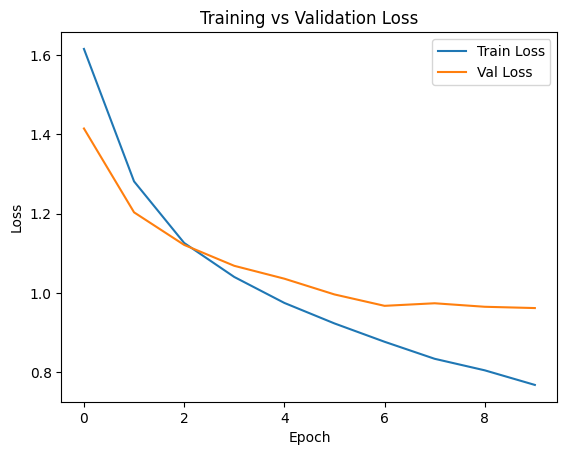

0.6765873479375406

In [8]:
evaluate_model(model_1, x_test, y_test, history_1)

### Evaluasi Model 2

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       0.77      0.67      0.71      1000
           1       0.87      0.75      0.81      1000
           2       0.66      0.47      0.55      1000
           3       0.43      0.61      0.50      1000
           4       0.61      0.60      0.61      1000
           5       0.56      0.55      0.55      1000
           6       0.73      0.77      0.75      1000
           7       0.77      0.67      0.72      1000
           8       0.74      0.83      0.78      1000
           9       0.73      0.80      0.76      1000

    accuracy                           0.67     10000
   macro avg       0.69      0.67      0.67     10000
weighted avg       0.69      0.67      0.67     10000

Macro F1-score: 0.6738


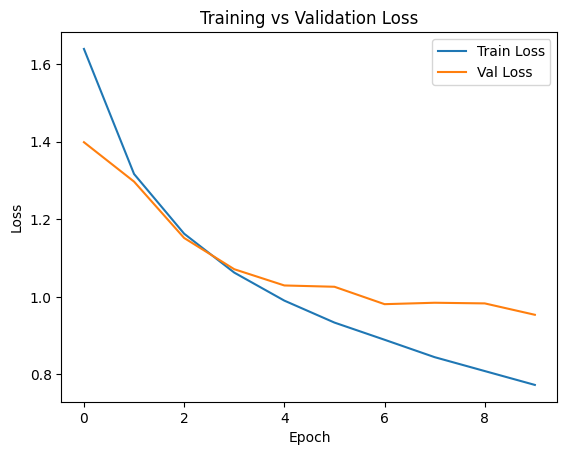

0.6738486915387232

In [9]:
evaluate_model(model_2, x_test, y_test, history_2)

### Evaluasi Model 3

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       0.70      0.63      0.66      1000
           1       0.80      0.68      0.74      1000
           2       0.51      0.50      0.50      1000
           3       0.50      0.34      0.40      1000
           4       0.46      0.68      0.55      1000
           5       0.56      0.51      0.54      1000
           6       0.70      0.68      0.69      1000
           7       0.58      0.76      0.66      1000
           8       0.82      0.66      0.73      1000
           9       0.66      0.74      0.70      1000

    accuracy                           0.62     10000
   macro avg       0.63      0.62      0.62     10000
weighted avg       0.63      0.62      0.62     10000

Macro F1-score: 0.6170


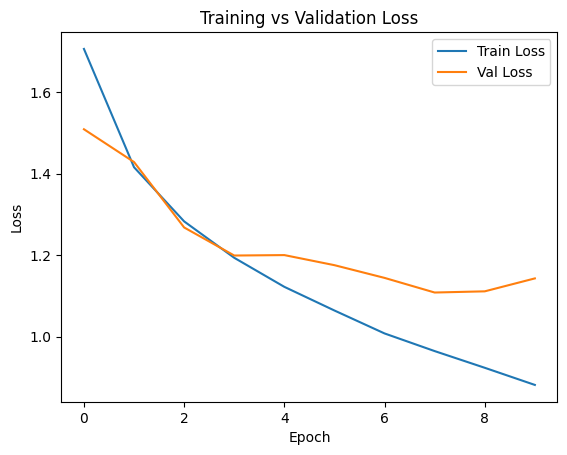

0.6170084577996259

In [10]:
evaluate_model(model_3, x_test, y_test, history_3)